In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from functions.load_data import *
from functions.clean_data import *

In [10]:
df = load_diabetes_data()
df_clean = clean_feature_data(df)

C:\Users\utgoy\Desktop\Cornell Tech\Fall 2024\2. ORIE 5160 Topics in Data Science and OR\Midterm Project\Topics_Project\code\functions\load_data.py:81: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'MISSING' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  diabetes.fillna("MISSING", inplace = True)


# Hypthosis Testing

In [24]:
# Create a contingency table for diabetes and race
contingency_table = pd.crosstab(df_clean['diabetes'], df_clean['non_hispanic_race'])

print("Contingency Table:")
print(contingency_table)

# Perform Chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p:.2e}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. There is a difference between races in terms of diabetes rates.")
else:
    print("Fail to reject the null hypothesis. There is no difference between races in terms of diabetes rates.")


Contingency Table:
non_hispanic_race  Asian Indian  Black/African American  Chinese  Filipino  \
diabetes                                                                     
NO                          314                    3176      311       357   
YES                          21                     547       14        44   

non_hispanic_race  Indian (American), Alaska Native  \
diabetes                                              
NO                                              355   
YES                                              73   

non_hispanic_race  Multiple race, no primary race selected  Other Asian  \
diabetes                                                                  
NO                                                      98          551   
YES                                                      5           50   

non_hispanic_race  Primary race not releasable  White  
diabetes                                               
NO                                

equitably analyze what races are more affected/susceptible to diabetes emergence

# Linear Regression

# diabetes

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_linear = df_clean[['non_hispanic_race', 'diabetes']]

# One-hot encode the race column (create columns for each race with 0 or 1 values)
df_linear = pd.get_dummies(df_linear, columns=['non_hispanic_race'], #drop_first=True
                          )
df_linear.drop(columns=['non_hispanic_race_Primary race not releasable'], inplace=True)
# Define the independent (predictor) variables: race columns
X = df_linear.filter(like='non_hispanic_race_')  # Select all the race dummy variables

# Define the dependent variable (target): diabetes (encoded as 0 = No, 1 = Yes)
y = df_linear['diabetes'].apply(lambda x: 1 if x == 'YES' else 0)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

dict_diabetes = {}

# Output the coefficients for each race
print(f"Intercept:{intercept: .4f}")
for race, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {race}: {coef:.2f}")

    dict_diabetes[race] = [coef]

Intercept: 0.1411
Coefficient for non_hispanic_race_Asian Indian: -0.08
Coefficient for non_hispanic_race_Black/African American: 0.01
Coefficient for non_hispanic_race_Chinese: -0.10
Coefficient for non_hispanic_race_Filipino: -0.03
Coefficient for non_hispanic_race_Indian (American), Alaska Native: 0.03
Coefficient for non_hispanic_race_Multiple race, no primary race selected: -0.09
Coefficient for non_hispanic_race_Other Asian: -0.06
Coefficient for non_hispanic_race_White: -0.04


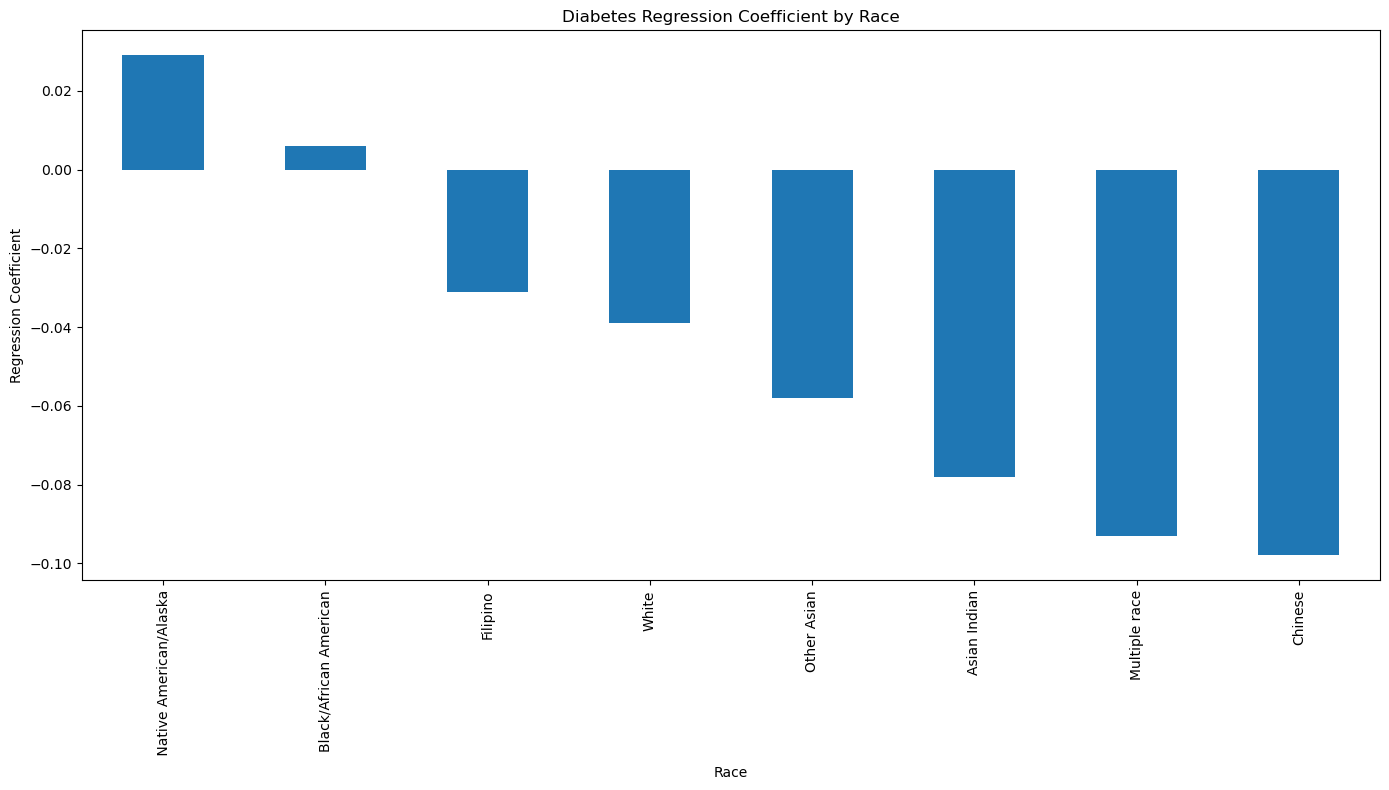

In [44]:
df_dia_reg = pd.DataFrame(dict_diabetes).T.round(3)
df_dia_reg.index = ['Asian Indian', 'Black/African American', 'Chinese', 'Filipino',
       ' Native American/Alaska','Multiple race', 'Other Asian', 'White']
df_dia_reg.sort_values(0, ascending=False, inplace=True)


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', #'#bcbd22', '#17becf'
         ]


df_dia_reg.plot(kind='bar',legend=False, figsize=(14, 8), color=colors)
plt.title('Diabetes Regression Coefficient by Race')
plt.xlabel('Race')
plt.ylabel('Regression Coefficient')
# plt.ylim(-0.1, 0.04)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Prior to colonization, Native American diets were typically based on locally sourced, nutrient-dense foods, but after contact with Europeans, many communities transitioned to diets high in processed foods, sugar, and saturated fats, contributing to increased diabetes risk. 

# smoker

In [47]:
df_linear = df_clean[['non_hispanic_race', 'smoker']]

# One-hot encode the race column (create columns for each race with 0 or 1 values)
df_linear = pd.get_dummies(df_linear, columns=['non_hispanic_race'], #drop_first=True
                          )
df_linear.drop(columns=['non_hispanic_race_Primary race not releasable'], inplace=True)
# Define the independent (predictor) variables: race columns
X = df_linear.filter(like='non_hispanic_race_')  # Select all the race dummy variables

# Define the dependent variable (target): diabetes (encoded as 0 = No, 1 = Yes)
y = df_linear['smoker'].apply(lambda x: 1 if x == 'YES' else 0)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

dict_diabetes = {}

# Output the coefficients for each race
print(f"Intercept:{intercept: .4f}")
for race, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {race}: {coef:.2f}")

    dict_diabetes[race] = [coef]

Intercept: 0.3926
Coefficient for non_hispanic_race_Asian Indian: -0.25
Coefficient for non_hispanic_race_Black/African American: -0.04
Coefficient for non_hispanic_race_Chinese: -0.24
Coefficient for non_hispanic_race_Filipino: -0.07
Coefficient for non_hispanic_race_Indian (American), Alaska Native: 0.10
Coefficient for non_hispanic_race_Multiple race, no primary race selected: -0.03
Coefficient for non_hispanic_race_Other Asian: -0.10
Coefficient for non_hispanic_race_White: 0.04


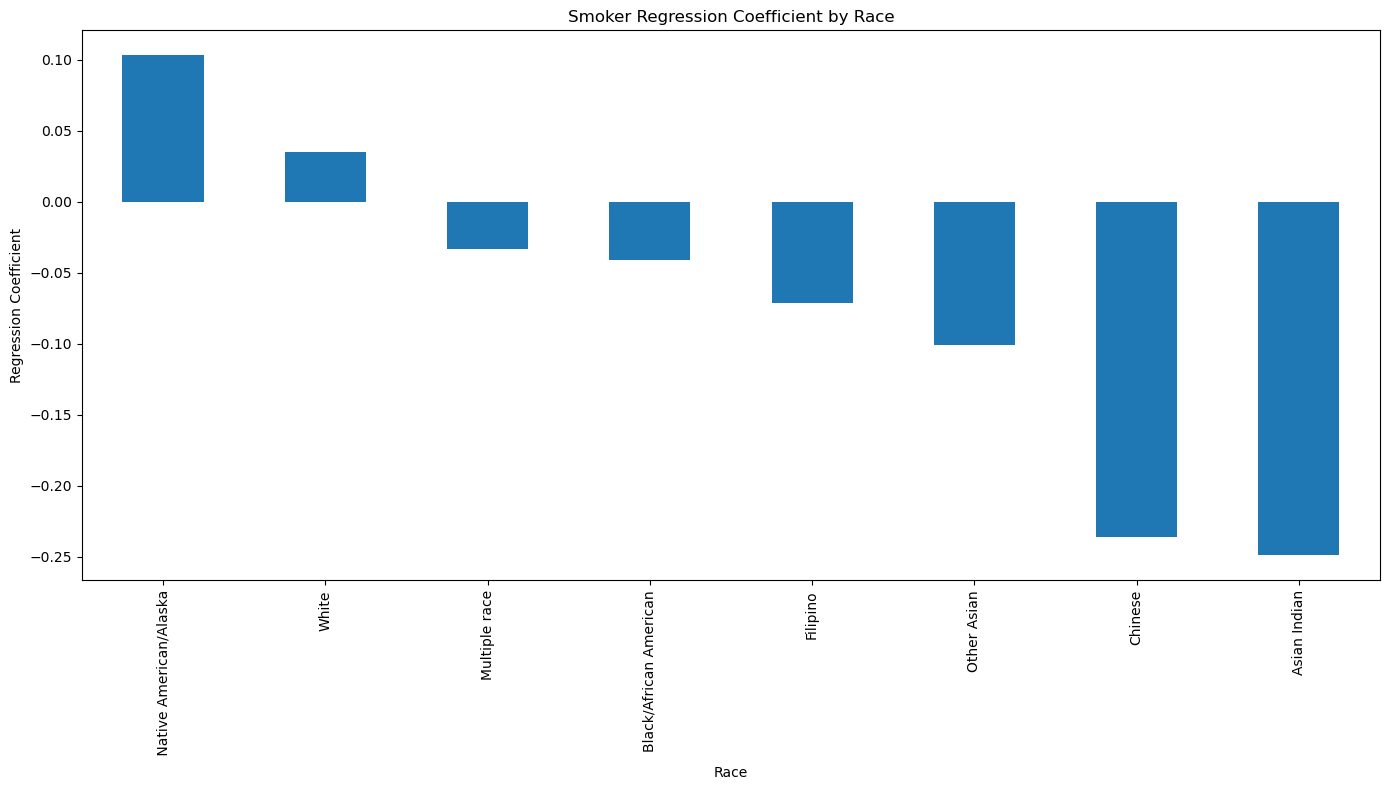

In [49]:
df_dia_reg = pd.DataFrame(dict_diabetes).T.round(3)
df_dia_reg.index = ['Asian Indian', 'Black/African American', 'Chinese', 'Filipino',
       ' Native American/Alaska','Multiple race', 'Other Asian', 'White']
df_dia_reg.sort_values(0, ascending=False, inplace=True)


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', #'#bcbd22', '#17becf'
         ]


df_dia_reg.plot(kind='bar',legend=False, figsize=(14, 8), color=colors)
plt.title('Smoker Regression Coefficient by Race')
plt.xlabel('Race')
plt.ylabel('Regression Coefficient')
# plt.ylim(-0.01, 0.13)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## hypertension

In [51]:
df_linear = df_clean[['non_hispanic_race', 'hypertension']]

# One-hot encode the race column (create columns for each race with 0 or 1 values)
df_linear = pd.get_dummies(df_linear, columns=['non_hispanic_race'], #drop_first=True
                          )
df_linear.drop(columns=['non_hispanic_race_Primary race not releasable'], inplace=True)
# Define the independent (predictor) variables: race columns
X = df_linear.filter(like='non_hispanic_race_')  # Select all the race dummy variables

# Define the dependent variable (target): diabetes (encoded as 0 = No, 1 = Yes)
y = df_linear['hypertension'].apply(lambda x: 1 if x == 'YES' else 0)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

dict_diabetes = {}

# Output the coefficients for each race
print(f"Intercept:{intercept: .4f}")
for race, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {race}: {coef:.2f}")

    dict_diabetes[race] = [coef]

Intercept: 0.3190
Coefficient for non_hispanic_race_Asian Indian: -0.15
Coefficient for non_hispanic_race_Black/African American: 0.13
Coefficient for non_hispanic_race_Chinese: -0.09
Coefficient for non_hispanic_race_Filipino: 0.07
Coefficient for non_hispanic_race_Indian (American), Alaska Native: 0.01
Coefficient for non_hispanic_race_Multiple race, no primary race selected: -0.08
Coefficient for non_hispanic_race_Other Asian: -0.03
Coefficient for non_hispanic_race_White: 0.03


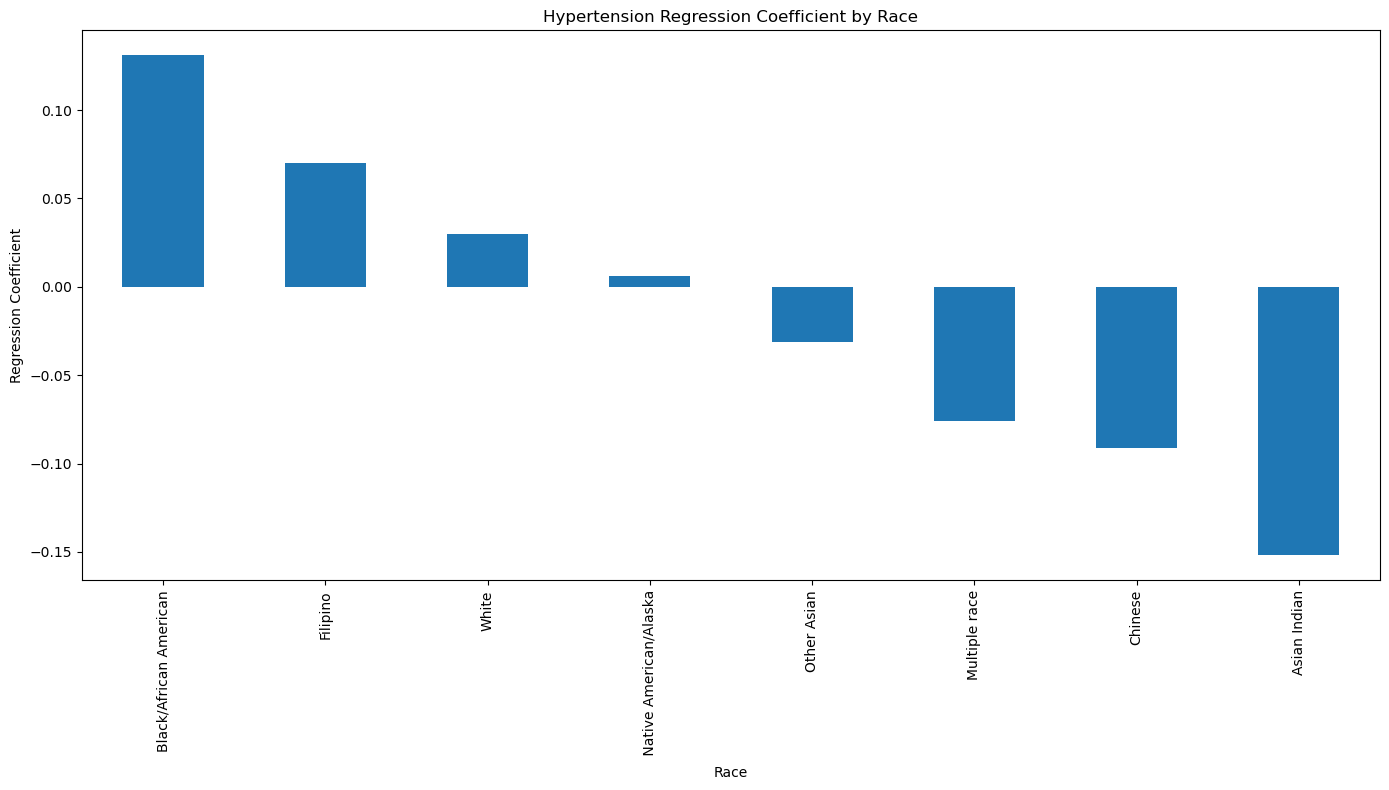

In [53]:
df_dia_reg = pd.DataFrame(dict_diabetes).T.round(3)
df_dia_reg.index = ['Asian Indian', 'Black/African American', 'Chinese', 'Filipino',
       ' Native American/Alaska','Multiple race', 'Other Asian', 'White']
df_dia_reg.sort_values(0, ascending=False, inplace=True)


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', #'#bcbd22', '#17becf'
         ]


df_dia_reg.plot(kind='bar',legend=False, figsize=(14, 8), color=colors)
plt.title('Hypertension Regression Coefficient by Race')
plt.xlabel('Race')
plt.ylabel('Regression Coefficient')
# plt.ylim(-0.01, 0.13)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

African Americans have a higher risk of hypertension due to a combination of genetic factors that may make them more sensitive to salt, higher rates of obesity, potential chronic stress related to systemic racism, and socioeconomic disadvantages which can contribute to poorer dietary habits and less access to healthcare, all leading to increased blood pressure levels